# Intro to Network Science

**Author: [Erika Fille Legara](http://erikalegara.site)**

[![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://github.com/eflegara/Network-Science-Lectures/blob/master/LICENSE.md)

<div class="alert alert-block alert-info">

For context, this notebook is accompanied by a two-session lecture (sessions 5-6) of the Network Science course under [AIM's MSc in Data Science program](https://aim.edu/programs/degree-programs/master-science-data-science). The first two course sessions are focused on the introduction to Complex Systems; and 3-4 focus on the intro to the science of network (conceptual and high-level approach with most discussions on use cases). This notebook is for the first set of hands-on sessions. <br/>
    
The main reference for this lecture/notebook is [A-L Barabasi's Network Science](http://networksciencebook.comhttp://networksciencebook.com). 

</div>

---

<table align="left" border = 0>
<!-- <table class="tfo-notebook-buttons" align="left"> -->
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/eflegara/Network-Science-Lectures/blob/master/Intro%20to%20Network%20Analysis.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/eflegara/Network-Science-Lectures/blob/master/Intro%20to%20Network%20Analysis.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

## 1. Graphs and DiGraphs

### 1.1. Adjacency Matrix

<img src="figure/N4L4graph.png" width="75%"> 
 
 The convention we use is if node $i \rightarrow j$, then $A_{ij}$; similary, if node $j \rightarrow i$, we are looking at $A_{ji}$. 
 
For example, for the **DiGraph** `adj_DiG`, node $1 \rightarrow 4$, but not the other way around. Thus, 

\begin{equation}
     A_{ij}=A_{14} = 1
\end{equation}
\begin{equation}
     A_{ji} = A_{41} = 0
\end{equation}

for $i=1$ and $j=4$.  

In matrix form,

\begin{equation}
A_{ij}=
  \left( {\begin{array}{cccc}
  A_{11} & A_{12} & A_{13} & A_{14}\\
  A_{21} & A_{22} & A_{23} & A_{24}\\
  A_{31} & A_{32} & A_{33} & A_{34}\\
  A_{41} & A_{42} & A_{43} & A_{44}\\
  \end{array} } \right).
\end{equation}

Therefore, for the two network representations above, Graph (`adj_G`) and DiGraph (`adj_DiG`), the matrix representation are the following.

<div class="alert alert-block alert-info">
<b>Important:</b> The indices used in the matrices start at 1, while indexing in Python starts at 0. Do remember this to avoid indexing mistakes.
</div>

In [2]:
adj_G = np.matrix([[0,1,0,1],
                   [1,0,0,1],
                   [0,0,0,1],
                   [1,1,1,0]])

adj_DiG = np.matrix([[0,1,0,1],
                     [0,0,0,0],
                     [0,0,0,0],
                     [0,1,1,0]])

### 1.2. Node Degree

 <img src="figure/node_degree.png" width="60%">

The degree of a node is the total number of links connected to it. Let's first look at the *unidrected* graph `adj_G` where $A_{ij}=A_{ji}$. **Node 4** has degree $k_4 = 3$. 

From the adjacency matrix, we can obtain this number by summing across any one of the axes. That is,

In [3]:
adj_G.sum(axis=0).item(0,3)

3

or

In [4]:
adj_G.sum(axis=1).item(3,0)

3

However, for directed graphs, extra care must be taken as switching axes may produce erroneous results. In the DiGraph, for **Node 4**, $k_4^{\text{in}}=1$ while $k_4^{\text{out}}=2$.

From the numpy matrix, these can be obtained using the following scripts.

In [5]:
# in-degree
adj_DiG.sum(axis=0).item(0,3)

1

In [6]:
# out-degree
adj_DiG.sum(axis=1).item(3,0)

2

<div class="alert alert-block alert-info">
<b>Important:</b> The order and axes depend on the way you define the adjacency matrix; that is, what you define as $i$ and $j$, how you represent the rows and columns, and how you represent $i \rightarrow j$ and $i \leftarrow j$ in the matrix.
</div>

## 2. Complete Graph

A complete graph is a graph where all nodes are connected to all other nodes in the graph. That is,

\begin{equation}
A_{ij}=
  \left( {\begin{array}{cccc}
  0 & 1 & 1 & 1\\
  1 & 0 & 1 & 1\\
  1 & 1 & 0 & 1\\
  1 & 1 & 1 & 0\\
  \end{array} } \right)
\end{equation}



In [7]:
complete_G = np.matrix([[0,1,1,1],
                        [1,0,1,1],
                        [1,1,0,1],
                        [1,1,1,0]])

In a complete graph, the total number of links is $L = L_{\text{max}}$, and

\begin{equation}
L_{\text{max}}=\frac{N(N-1)}{2}.
\end{equation}

In [8]:
lmax = complete_G.sum(axis=0).sum()/2
print(lmax)

6.0


We divide the sum by 2, to avoid double counting. That is, once the link between $1,2$ is considered ($A_{12}=1$) we don't any more include $2,1$ ($A_{21}=1$).

<img src="figure/N4L6.png" width="30%"> 

The metric $L_{\text{max}}$ is relevant to appreciate how sparse most real-world networks are. That is,



| network | $N$  | $L$  | $L_{\text{max}}$ | $\left<k \right>$ |
|---|---|---|---|---|
| WWW | $325,729$ | $1.4 \times 10^6$  | $10^{12}$ |  4.51  |
|Protein | $1,870$   | $4,470$ | $10^7$ | $2.39$ |      
|Co-authorship | $70,975$  | $2 \times 10^5$ | $3 \times 10^{10}$ | $3.9$ |
|Movie Actors | $212,250$ | $6 \times 10^6$ | $1.8 \times 10^{13}$ | $28.78$ |


## 3. NetworkX Graphs

From this point forward, we use the `NetworkX` package.

<img src="figure/N4L4graph.png" width="75%">
 
### 3.1 Basic Graph

In this part of the notebook, we will be using the [`networkx` package](https://networkx.org) for "the creation, manipulation, and study of the structure, dynamics, and functions of complex networks."

In [9]:
import networkx as nx

Let's create an empty networkx graph `G`.

In [10]:
G = nx.Graph()

In [11]:
type(G)

networkx.classes.graph.Graph

In the next cell, we build a graph by adding edges and nodes. 

In [12]:
G.add_edge(1,2)
G.add_edge(1,4)
G.add_edge(2,4)
G.add_edge(4,3)

The `pos` variable below sets the position/layout of the nodes in the visualization. More often than not, this is only for aesthetics purposes. To see other layouts, check [this out](https://networkx.github.io/documentation/networkx-1.10/reference/drawing.html#layout).

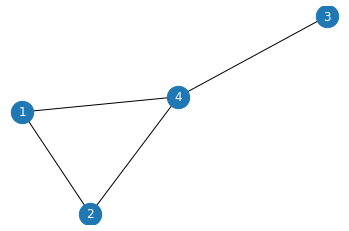

In [13]:
pos = nx.spring_layout(G);
nx.draw_networkx_labels(G, pos, font_color ='white');
nx.draw(G, pos = pos, node_size=500);

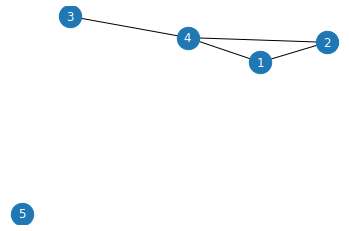

In [14]:
G.add_node(5)

pos = nx.spring_layout(G);
nx.draw_networkx_labels(G, pos, font_color ='white');
nx.draw(G, pos = pos, node_size=500);

In the previous cell, we added a 5th node, but didn't specify the link(s) connected to it. Thus, we can observe that the node is disconnected. 

In the next cell, let's add a link between the 4th and 5th nodes.

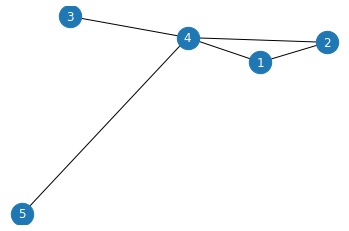

In [15]:
G.add_edge(4,5)

nx.draw_networkx_labels(G, pos, font_color ='white');
nx.draw(G, pos = pos, node_size=500);

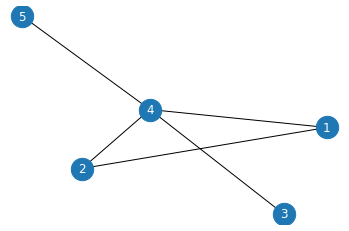

In [16]:
pos = nx.spring_layout(G);
nx.draw_networkx_labels(G, pos, font_color ='white');
nx.draw(G, pos = pos, node_size=500);

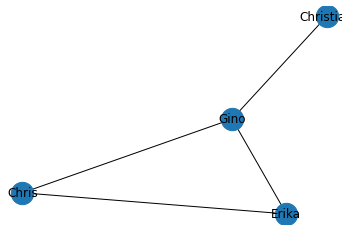

In [17]:
G = nx.Graph()

G.add_edge('Erika', 'Chris')
G.add_edge('Erika', 'Gino')
G.add_edge('Chris', 'Gino')
G.add_edge('Gino', 'Christian')

pos = nx.spring_layout(G);
nx.draw_networkx_labels(G, pos, font_color ='k');
nx.draw(G, pos = pos, node_size=500);

In [18]:
G.nodes()

NodeView(('Erika', 'Chris', 'Gino', 'Christian'))

In [19]:
G.add_node('Arielle')
G.nodes()

NodeView(('Erika', 'Chris', 'Gino', 'Christian', 'Arielle'))

Let's try removing nodes. Can we use an index in removing the nodes? Say, index 1?

In [20]:
try:
    G.remove_node(1)
except Exception as e: 
    print(e)
    
G.nodes()

The node 1 is not in the graph.


NodeView(('Erika', 'Chris', 'Gino', 'Christian', 'Arielle'))

To remove a node, we have to actually identify the node by its label/name. If this has not initially been introduced, the equivalent would be the numerical name.

In [21]:
G.remove_node('Arielle')
G.nodes()

NodeView(('Erika', 'Chris', 'Gino', 'Christian'))

It's easy to check the number of nodes and edges in the network.

Number of nodes:  4
Number of edges:  4


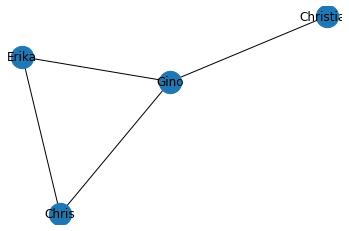

In [22]:
print ('Number of nodes: ', G.number_of_nodes())
print ('Number of edges: ', G.number_of_edges())

pos = nx.spring_layout(G);
nx.draw_networkx_labels(G, pos, font_color ='k');
nx.draw(G, pos = pos, node_size=500);

In [23]:
list(G.neighbors('Gino'))

['Erika', 'Chris', 'Christian']

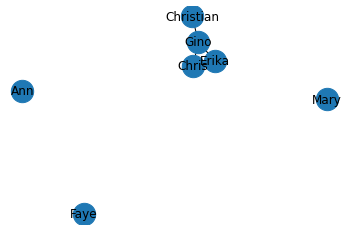

In [24]:
G.add_nodes_from(['Ann','Faye','Mary'])

pos = nx.spring_layout(G);
nx.draw_networkx_labels(G, pos, font_color ='k');
nx.draw(G, pos = pos, node_size=500);

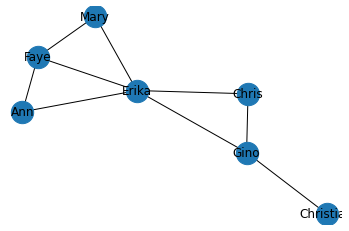

In [25]:
G.add_edges_from([('Ann', 'Erika'),
                  ('Ann', 'Faye'),
                  ('Faye', 'Mary'),
                  ('Erika', 'Mary'),
                  ('Erika', 'Faye')])

pos = nx.spring_layout(G);
nx.draw_networkx_labels(G, pos, font_color ='k');
nx.draw(G, pos = pos, node_size=500);

In [26]:
G.degree('Erika')

5

In [27]:
list(G.neighbors('Erika'))

['Chris', 'Gino', 'Ann', 'Mary', 'Faye']

### 3.2 Weighted Graphs and Other Edge Attributes

More often than not, in the real-world, links have weights. For example, there are certain friendships that are stronger than others. Another example is quantifying how often two individuals exchange emails at work. These "strengths" can be quantified by adding a weight attribute. In addition to the weight, we can also add other edge attributes as shown below where we added the attribute `relationship_type`, which could be "friends", "family", "professional", for example. 

In [28]:
G['Ann']['Faye']['weight'] = 8
G['Faye']['Mary']['weight'] = 10
G['Faye']['Mary']['relatioinship_type'] = 'friends'

In [29]:
G.edges(data=True)

EdgeDataView([('Erika', 'Chris', {}), ('Erika', 'Gino', {}), ('Erika', 'Ann', {}), ('Erika', 'Mary', {}), ('Erika', 'Faye', {}), ('Chris', 'Gino', {}), ('Gino', 'Christian', {}), ('Ann', 'Faye', {'weight': 8}), ('Faye', 'Mary', {'weight': 10, 'relatioinship_type': 'friends'})])

In [30]:
try: 
    G['Ann']['Mary']['weight'] = 5
except Exception as e:
    print (e)

'Mary'


In [31]:
G.add_edge('Ann', 'Mary', weight = 30)

In [32]:
G.add_edge('Ann', 'Mary', relatioinship_type = 'siblings')

In [33]:
G.edges(data=True)

EdgeDataView([('Erika', 'Chris', {}), ('Erika', 'Gino', {}), ('Erika', 'Ann', {}), ('Erika', 'Mary', {}), ('Erika', 'Faye', {}), ('Chris', 'Gino', {}), ('Gino', 'Christian', {}), ('Ann', 'Faye', {'weight': 8}), ('Ann', 'Mary', {'weight': 30, 'relatioinship_type': 'siblings'}), ('Faye', 'Mary', {'weight': 10, 'relatioinship_type': 'friends'})])

In [34]:
G.add_edge('Ann', 'Mary', friendship = 2)
G['Ann']['Faye']['friendship'] = 4
G.edges(data=True)

EdgeDataView([('Erika', 'Chris', {}), ('Erika', 'Gino', {}), ('Erika', 'Ann', {}), ('Erika', 'Mary', {}), ('Erika', 'Faye', {}), ('Chris', 'Gino', {}), ('Gino', 'Christian', {}), ('Ann', 'Faye', {'weight': 8, 'friendship': 4}), ('Ann', 'Mary', {'weight': 30, 'relatioinship_type': 'siblings', 'friendship': 2}), ('Faye', 'Mary', {'weight': 10, 'relatioinship_type': 'friends'})])

In [35]:
nx.write_edgelist(G, 'myG')

### 3.3 Directed Graphs

Many networks in the real-world are also directed. That is, the relationship between two entities has a particular direction. This directionality could represent, for example, who emailed whom, or who responded to whom on Twitter, or who follows whom on Twitter or TikTok, etc. 

In [36]:
dG = nx.DiGraph()

In [37]:
dG.add_edges_from([('Ann', 'Mary'), ('Mary', 'Ann')])

In [38]:
dG.add_weighted_edges_from([('Ann', 'Mary', 3), 
                            ('Mary', 'Ann', 2)])

In [39]:
dG.edges(data=True)

OutEdgeDataView([('Ann', 'Mary', {'weight': 3}), ('Mary', 'Ann', {'weight': 2})])

In [40]:
dG = nx.to_directed(G)

In [41]:
dG.edges(data=True)

OutEdgeDataView([('Erika', 'Chris', {}), ('Erika', 'Gino', {}), ('Erika', 'Ann', {}), ('Erika', 'Mary', {}), ('Erika', 'Faye', {}), ('Chris', 'Erika', {}), ('Chris', 'Gino', {}), ('Gino', 'Erika', {}), ('Gino', 'Chris', {}), ('Gino', 'Christian', {}), ('Christian', 'Gino', {}), ('Ann', 'Erika', {}), ('Ann', 'Faye', {'weight': 8, 'friendship': 4}), ('Ann', 'Mary', {'weight': 30, 'relatioinship_type': 'siblings', 'friendship': 2}), ('Faye', 'Ann', {'weight': 8, 'friendship': 4}), ('Faye', 'Mary', {'weight': 10, 'relatioinship_type': 'friends'}), ('Faye', 'Erika', {}), ('Mary', 'Faye', {'weight': 10, 'relatioinship_type': 'friends'}), ('Mary', 'Erika', {}), ('Mary', 'Ann', {'weight': 30, 'relatioinship_type': 'siblings', 'friendship': 2})])

### 3.4 Adjacency Matrix to NetworkX Graph
<div class="alert alert-block alert-info">
<b>Important:</b> Did you know that you can create a networkx graph from a numpy (adjacency) matrix?
</div>

In [42]:
nxG = nx.from_numpy_matrix(adj_G)
nxG.degree

DegreeView({0: 2, 1: 2, 2: 1, 3: 3})

In this new scheme, the node labels start at 0 such that in the drawing where Node 4 has degree 3, here in the networkx graph it is **Node 4 is Node 3** and it has degree 3.

## 4. Graph Properties

Now that we have constructed our graphs, how then do we describe them? This section provides some of the metrics to characterize network structures. 


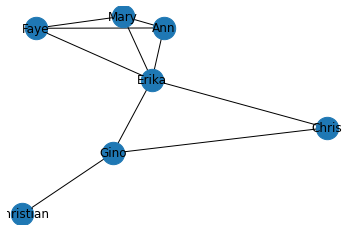

In [43]:
pos = nx.spring_layout(G);
nx.draw_networkx_labels(G, pos, font_color ='k');
nx.draw(G, pos = pos, node_size=500);

In [44]:
pos

{'Erika': array([0.02706149, 0.10393789]),
 'Chris': array([ 0.28659159, -0.29094789]),
 'Gino': array([-0.03128256, -0.49965561]),
 'Christian': array([-0.16533555, -1.        ]),
 'Ann': array([0.04453496, 0.53095473]),
 'Faye': array([-0.14542026,  0.52833546]),
 'Mary': array([-0.01614966,  0.62737541])}

### 4.1 Network Statistics

1. Size - total number of edges/links
2. Order - total number of vertices/nodes
3. Average degree

In [45]:
N = G.order()
L = G.size() 

avg_deg = float(L) / N 

print ('Nodes: ', N)
print ('Edges: ', L)
print ('Average degree: ', avg_deg)

Nodes:  7
Edges:  10
Average degree:  1.4285714285714286


### 4.2 Degree Distribution
The degree distribution, as the term implies, is the **probability distribution** of all node degrees over the entire network.

In [46]:
nx.degree(G)

DegreeView({'Erika': 5, 'Chris': 2, 'Gino': 3, 'Christian': 1, 'Ann': 3, 'Faye': 3, 'Mary': 3})

In [47]:
degrees = [k for node, k in nx.degree(G)]
print(degrees)

[5, 2, 3, 1, 3, 3, 3]


In [48]:
k_min = np.min(degrees)
k_max = np.max(degrees)
k_avg = np.mean(degrees)

print ('Minimum degree: ', k_min)
print ('Maximum degree: ', k_max)
print ('Average degree: ', k_avg)

Minimum degree:  1
Maximum degree:  5
Average degree:  2.857142857142857


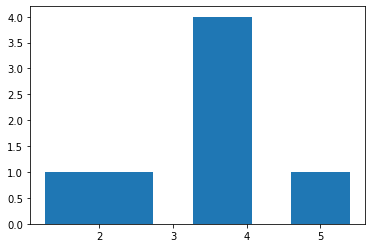

In [49]:
p, k = np.histogram([k for n,k in nx.degree(G)], bins = 6);
plt.bar(k[1:],p);

### 4.3 Shortest Paths

In [50]:
nx.average_shortest_path_length(G)

1.6666666666666667

In [51]:
nx.shortest_path(G, 'Erika', 'Mary')

['Erika', 'Mary']

In [52]:
nx.shortest_path(G, 'Mary', 'Gino')

['Mary', 'Erika', 'Gino']

In [53]:
nx.shortest_path_length(G, 'Mary', 'Gino')

2

In [54]:
nx.shortest_path_length(G, 'Mary', 'Christian')

3

In [55]:
list(nx.all_pairs_shortest_path_length(G))

[('Erika',
  {'Erika': 0,
   'Faye': 1,
   'Mary': 1,
   'Ann': 1,
   'Chris': 1,
   'Gino': 1,
   'Christian': 2}),
 ('Chris',
  {'Chris': 0,
   'Gino': 1,
   'Erika': 1,
   'Faye': 2,
   'Mary': 2,
   'Ann': 2,
   'Christian': 2}),
 ('Gino',
  {'Gino': 0,
   'Christian': 1,
   'Chris': 1,
   'Erika': 1,
   'Faye': 2,
   'Mary': 2,
   'Ann': 2}),
 ('Christian',
  {'Christian': 0,
   'Gino': 1,
   'Chris': 2,
   'Erika': 2,
   'Faye': 3,
   'Mary': 3,
   'Ann': 3}),
 ('Ann',
  {'Ann': 0,
   'Faye': 1,
   'Mary': 1,
   'Erika': 1,
   'Chris': 2,
   'Gino': 2,
   'Christian': 3}),
 ('Faye',
  {'Faye': 0,
   'Ann': 1,
   'Mary': 1,
   'Erika': 1,
   'Chris': 2,
   'Gino': 2,
   'Christian': 3}),
 ('Mary',
  {'Mary': 0,
   'Faye': 1,
   'Ann': 1,
   'Erika': 1,
   'Chris': 2,
   'Gino': 2,
   'Christian': 3})]

### 4.4 Clustering Coefficient

 <img src="figure/clust_coeff.png" width="75%">
 
The clustering coefficient essentially quantifies how ones "friends" are "friends" with each other.

In [56]:
nx.clustering(G, 'Erika')

0.4

In [57]:
nx.clustering(G, 'Faye')

1.0

In [58]:
cc = nx.clustering(G)
avg_clust = sum(cc.values()) / len(cc)
print(avg_clust)

0.6761904761904762


## 5. Exercises: Real-World Network


### 5.1 Zachary's Karate Club

Zachary, W. W. (1977), ‘An Information Flow Model for Conflict and Fission in Small Groups’, Journal of Anthropological Research 33, 452-473.

**Description** 

This is the well-known and much-used Zachary karate club network. The data was collected from the members of a university karate club by Wayne Zachary in 1977. Each node represents a member of the club, and each edge represents a tie between two members of the club.

In [59]:
K = nx.karate_club_graph()

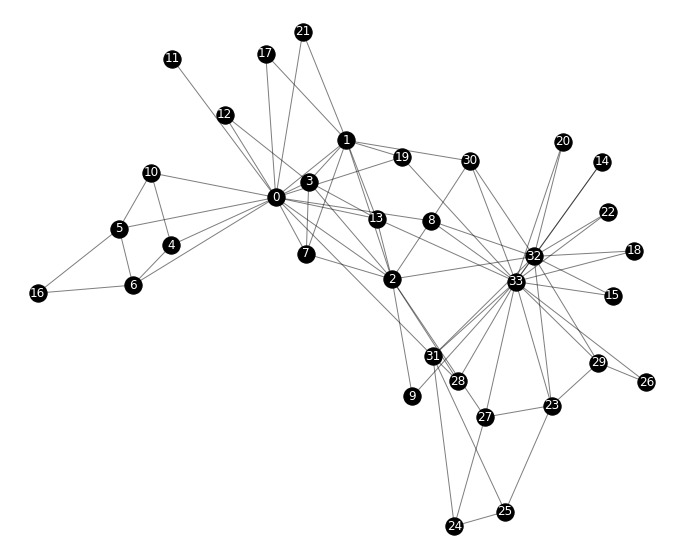

In [60]:
pos = nx.fruchterman_reingold_layout(K);

plt.figure(figsize=(12,10));
plt.axis("off");
nx.draw_networkx_nodes(K, pos, node_size=300, node_color="black");
nx.draw_networkx_edges(K, pos, alpha=0.500);
nx.draw_networkx_labels(K, pos, font_color="white");
plt.show();

#### 5.1.1 Network Structure Properties

#### 5.1.2 Network Insights

### 5.2 Davis Southern women social network

Vladimir Batagelj and Andrej Mrvar (2006): Pajek datasets
http://vlado.fmf.uni-lj.si/pub/networks/data/. 

**Description**

This is a data set of 18 women observed over a nine-month period. During that period, various subsets of these women met in a series of 14 informal social events. The data recored which women met for which events.

In [61]:
DS = nx.davis_southern_women_graph()

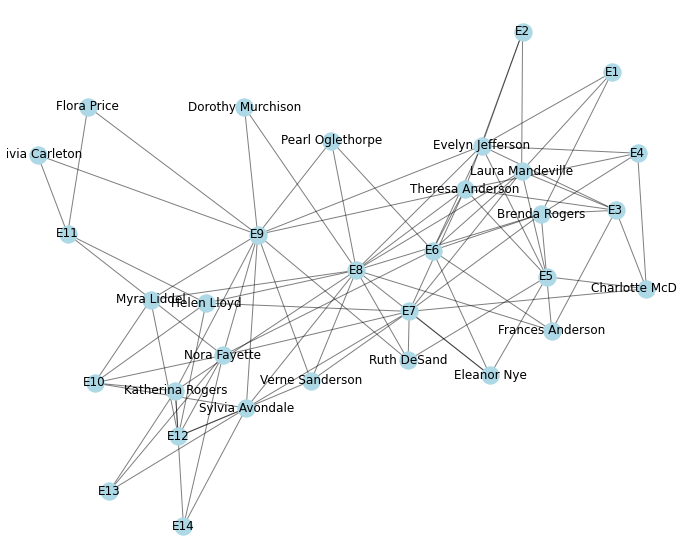

In [62]:
pos = nx.fruchterman_reingold_layout(DS);

plt.figure(figsize=(12,10));
plt.axis("off");
nx.draw_networkx_nodes(DS, pos, node_size=300, node_color="lightblue");
nx.draw_networkx_edges(DS, pos, alpha=0.500);
nx.draw_networkx_labels(DS, pos, font_color='black');
plt.show();


#### 5.2.1 Network Structure Properties

#### 5.2.2 Network Insights

### 5.3 Florentine families

- Breiger R. and Pattison P. (1986). Cumulated social roles: The duality of persons and their algebras. Social Networks, 8, 215-256.
- Padgett, John F. 1994. Marriage and Elite Structure in Renaissance Florence, 1282-1500. Paper delivered to the Social Science History Association. 

**Description** 

This is a data set of marriage and business ties among Renaissance Florentine families.

In [63]:
florentine = nx.florentine_families_graph() 

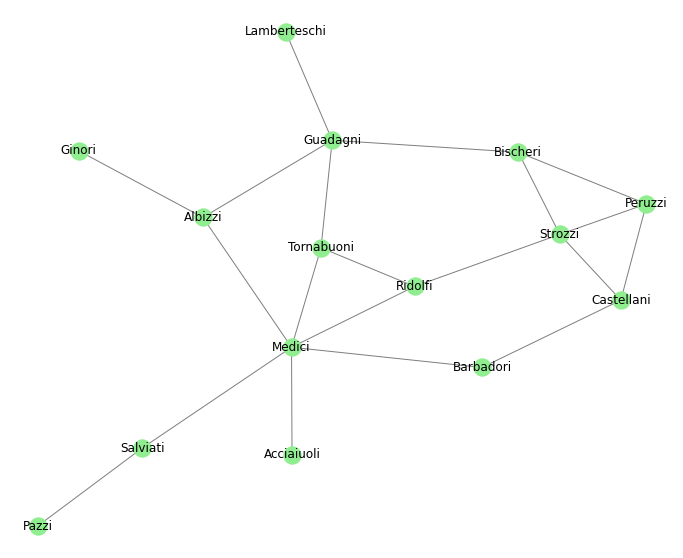

In [64]:
pos = nx.fruchterman_reingold_layout(florentine);

plt.figure(figsize=(12,10));
plt.axis("off");
nx.draw_networkx_nodes(florentine, pos, node_size=300, node_color="lightgreen");
nx.draw_networkx_edges(florentine, pos, alpha=0.500);
nx.draw_networkx_labels(florentine, pos, font_color='black');
plt.show();


#### 5.3.1 Network Structure Properties

#### 5.3.2 Network Insights

### 5.4 MSDS 2020 Hangout Network
The MSDS 2020 Hangout Network was generated in class on 06 February 2020. The instruction given to the students was:

*"Who among your classmates do you most frequently hangout with [not necessarily for classwork] (choose 3 to 8)? Alternatively, who are those you enjoy hanging out with the most?"*

The dataset is anonymized.

#### 5.4.1 Network Structure Properties

#### 5.3.2 Network Insights